In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.graphics.api as smg
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
sns.set_style('darkgrid')

# Lesson 33 - Multiple Regression

In [4]:
sat = pd.read_csv('patient.csv')
sat.describe()

,Satisfaction,Age,Severity,Anxiety
count,46.000000,46.000000,46.000000,46.000000
mean,61.565217,38.391304,50.434783,2.286957
std,17.236463,8.918092,4.313556,0.299339
min,26.000000,22.000000,41.000000,1.800000
25%,48.250000,31.250000,48.000000,2.100000
50%,60.000000,37.500000,50.500000,2.300000
75%,76.750000,44.750000,53.000000,2.475000
max,92.000000,55.000000,62.000000,2.900000


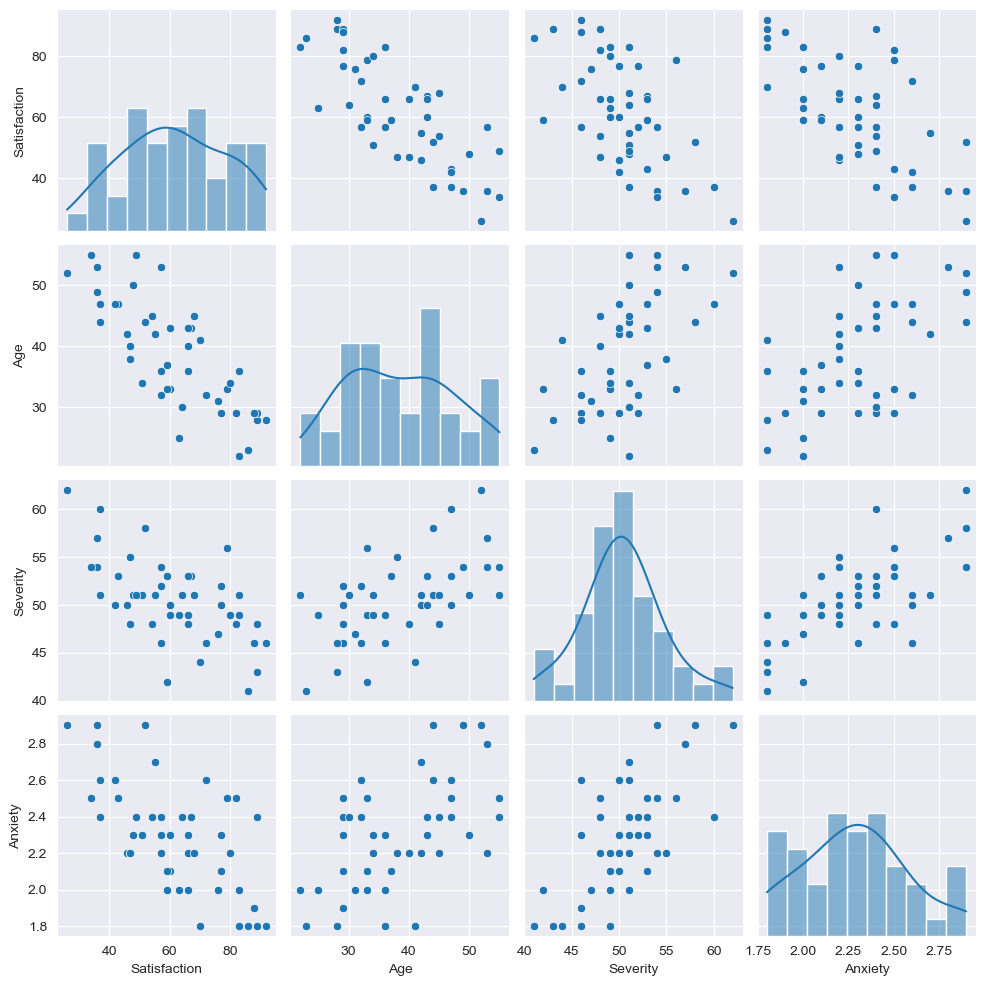

In [6]:
# step 1 - hypothesize the deterministic component
# pair plot
sns.pairplot(sat, diag_kws={'bins':10, 'kde':True})

In [7]:
# step 2 
# fit model
sat_model = smf.ols('Satisfaction ~ Age + Severity + Anxiety', sat).fit()
sat_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.659   
Dependent Variable: Satisfaction     AIC:                346.7273
Date:               2023-08-10 17:49 BIC:                354.0419
No. Observations:   46               Log-Likelihood:     -169.36 
Df Model:           3                F-statistic:        30.05   
Df Residuals:       42               Prob (F-statistic): 1.54e-10
R-squared:          0.682            Scale:              101.16  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept  158.4913   18.1259   8.7439  0.0000  121.9117  195.0708
Age         -1.1416    0.2148  -5.3148  0.0000   -1.5751   -0.7081
Severity    -0.4420    0.4920  -0.8984  0.3741   -1.4348    0.5508
Anxiety    -13.4702    7.0997  -1.8973  0.0647  -27.7979    0.8575
-----------------------------------------------------------------
Omnibus:               5.219        Durbin-Watson:          2.183
Prob(Omnibus):         0.074        Jarque-Bera (JB):       2.074
Skew:                  -0.098       Prob(JB):               0.354
Kurtosis:              1.978        Condition No.:          782  
=================================================================

"""

In [8]:
# step 3 - estimate standard deviation of the random error term
mse = sat_model.mse_resid

In [9]:
rmse = mse**.5
rmse

10.05797561028013

In [10]:
# step 4 - check assumptions and modify model
# this will be covered in another lesson

In [14]:
# why r^2 is not good enough
sat['rand'] = np.random.rand(len(sat))
sat_model2 = smf.ols('Satisfaction ~ Age + Severity + Anxiety + rand', sat).fit()
sat_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.684   
Dependent Variable: Satisfaction     AIC:                344.1489
Date:               2023-08-10 18:00 BIC:                353.2921
No. Observations:   46               Log-Likelihood:     -167.07 
Df Model:           4                F-statistic:        25.38   
Df Residuals:       41               Prob (F-statistic): 1.26e-10
R-squared:          0.712            Scale:              93.813  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept  150.4001   17.8867   8.4085  0.0000  114.2771  186.5230
Age         -1.1672    0.2072  -5.6329  0.0000   -1.5857   -0.7487
Severity    -0.4179    0.4739  -0.8818  0.3830   -1.3750    0.5392
Anxiety    -11.7840    6.8852  -1.7115  0.0945  -25.6889    2.1209
rand        10.0464    4.8500   2.0714  0.0447    0.2515   19.8412
-----------------------------------------------------------------
Omnibus:               7.587        Durbin-Watson:          2.266
Prob(Omnibus):         0.023        Jarque-Bera (JB):       3.131
Skew:                  -0.341       Prob(JB):               0.209
Kurtosis:              1.919        Condition No.:          803  
=================================================================

"""

In [15]:
# step 5 - statistically evaluate the utility of the model
n = len(sat)
sat['pred'] = sat_model.predict()
sat['resid'] = sat['Satisfaction'] - sat['pred']
SS_yy = sat['Satisfaction'].var(ddof=0) * n
SSE = sat['resid'].var(ddof=0) * n
R2 = 1 - (SSE / SS_yy)
R2

0.6821943332807396

In [16]:
k = 3
R2a = 1 - (n-1)/(n-(k+1)) * (1-R2)
R2a

0.6594939285150783

In [17]:
F = sat_model.mse_model / sat_model.mse_resid
F

30.052077939715147

In [19]:
stats.f.sf(F, dfn=k, dfd=n-(k+1))

1.5419725985736389e-10

In [18]:
print(sat_model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.659   
Dependent Variable: Satisfaction     AIC:                346.7273
Date:               2023-08-10 18:13 BIC:                354.0419
No. Observations:   46               Log-Likelihood:     -169.36 
Df Model:           3                F-statistic:        30.05   
Df Residuals:       42               Prob (F-statistic): 1.54e-10
R-squared:          0.682            Scale:              101.16  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept  158.4913   18.1259   8.7439  0.0000  121.9117  195.0708
Age         -1.1416    0.2148  -5.3148  0.0000   -1.5751   -0.7081
Severity    -0.4420    0.4920  -0.8984  0.3741   -1.4348    0.5508
Anxiety    -13.4702    7.0997  -1.8973  0.0647  -27.7979    0.8575
--------------------

In [20]:
sat_model3 = smf.ols('Satisfaction ~ Age + Anxiety', sat).fit()
print(sat_model3.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.661   
Dependent Variable: Satisfaction     AIC:                345.6030
Date:               2023-08-10 18:20 BIC:                351.0889
No. Observations:   46               Log-Likelihood:     -169.80 
Df Model:           2                F-statistic:        44.88   
Df Residuals:       43               Prob (F-statistic): 2.98e-11
R-squared:          0.676            Scale:              100.71  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept  145.9412   11.5251  12.6629  0.0000  122.6987  169.1838
Age         -1.2005    0.2041  -5.8816  0.0000   -1.6121   -0.7889
Anxiety    -16.7421    6.0808  -2.7533  0.0086  -29.0052   -4.4789
-----------------------------------------------------------------
Omnibus:             

In [22]:
# step 6 - when satisfied that the model is useful, apply it
print(sat_model3.summary2(alpha=0.05/2))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.661   
Dependent Variable: Satisfaction     AIC:                345.6030
Date:               2023-08-10 18:28 BIC:                351.0889
No. Observations:   46               Log-Likelihood:     -169.80 
Df Model:           2                F-statistic:        44.88   
Df Residuals:       43               Prob (F-statistic): 2.98e-11
R-squared:          0.676            Scale:              100.71  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|   [0.0125   0.9875] 
------------------------------------------------------------------
Intercept  145.9412   11.5251  12.6629  0.0000  119.1728  172.7096
Age         -1.2005    0.2041  -5.8816  0.0000   -1.6745   -0.7264
Anxiety    -16.7421    6.0808  -2.7533  0.0086  -30.8655   -2.6186
-----------------------------------------------------------------
Omnibus:             

In [23]:
# getting information out of summary
summary = sat_model3.summary2()

In [24]:
for ii in range(3):
    print(f'Table {ii}')
    print(summary.tables[ii])
    print('-------------------------------------------------------------------')

Table 0
                     0                 1                    2         3
0               Model:               OLS      Adj. R-squared:     0.661
1  Dependent Variable:      Satisfaction                 AIC:  345.6030
2                Date:  2023-08-10 18:30                 BIC:  351.0889
3    No. Observations:                46      Log-Likelihood:   -169.80
4            Df Model:                 2         F-statistic:     44.88
5        Df Residuals:                43  Prob (F-statistic):  2.98e-11
6           R-squared:             0.676               Scale:    100.71
-------------------------------------------------------------------
Table 1
                Coef.   Std.Err.          t         P>|t|      [0.025   
Intercept  145.941228  11.525093  12.662912  4.207938e-16  122.698664  \
Age         -1.200471   0.204105  -5.881628  5.434059e-07   -1.612089   
Anxiety    -16.742052   6.080831  -2.753251  8.609753e-03  -29.005215   

               0.975]  
Intercept  169.183792  

In [25]:
summary.tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,145.941228,11.525093,12.662912,4.207938e-16,122.698664,169.183792
Age,-1.200471,0.204105,-5.881628,5.434059e-07,-1.612089,-0.788854
Anxiety,-16.742052,6.080831,-2.753251,8.609753e-03,-29.005215,-4.478888


In [28]:
print(summary.tables[1].to_latex())

\begin{tabular}{lrrrrrr}
\toprule
 & Coef. & Std.Err. & t & P>|t| & [0.025 & 0.975] \\
\midrule
Intercept & 145.941228 & 11.525093 & 12.662912 & 0.000000 & 122.698664 & 169.183792 \\
Age & -1.200471 & 0.204105 & -5.881628 & 0.000001 & -1.612089 & -0.788854 \\
Anxiety & -16.742052 & 6.080831 & -2.753251 & 0.008610 & -29.005215 & -4.478888 \\
\bottomrule
\end{tabular}



In [29]:
# Estimation / Prediction Intervals
sat_pred = pd.DataFrame({'Age':[30], 'Severity':[45], 'Anxiety':[2.5]})
sat_pred = sat_pred.join(sat_model.get_prediction(sat_pred).summary_frame(alpha=0.05))
sat_pred

,Age,Severity,Anxiety,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,30,45,2.5,70.677297,4.216636,62.167781,79.186812,48.667907,92.686686


### Progress Check

In [32]:
df = pd.read_csv('UScrime.csv')
df.describe()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
count,47.000000,47.000000,47.00000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,13.857447,0.340426,10.56383,8.500000,8.023404,0.561191,98.302128,36.617021,10.112766,0.095468,3.397872,5253.829787,19.400000,0.047091,26.597921,905.085106
std,1.256763,0.478975,1.11870,2.971897,2.796132,0.040412,2.946737,38.071188,10.282882,0.018029,0.844545,964.909442,3.989606,0.022737,7.086895,386.762697
min,11.900000,0.000000,8.70000,4.500000,4.100000,0.480000,93.400000,3.000000,0.200000,0.070000,2.000000,2880.000000,12.600000,0.006900,12.199600,342.000000
25%,13.000000,0.000000,9.75000,6.250000,5.850000,0.530500,96.450000,10.000000,2.400000,0.080500,2.750000,4595.000000,16.550000,0.032701,21.600350,658.500000
50%,13.600000,0.000000,10.80000,7.800000,7.300000,0.560000,97.700000,25.000000,7.600000,0.092000,3.400000,5370.000000,17.600000,0.042100,25.800600,831.000000
75%,14.600000,1.000000,11.45000,10.450000,9.700000,0.593000,99.200000,41.500000,13.250000,0.104000,3.850000,5915.000000,22.750000,0.054450,30.450750,1057.500000
max,17.700000,1.000000,12.20000,16.600000,15.700000,0.641000,107.100000,168.000000,42.300000,0.142000,5.800000,6890.000000,27.600000,0.119804,44.000400,1993.000000


In [40]:
model = smf.ols('Crime ~ Ed + Po1 + Wealth + Ineq',data=df).fit()
print(model.summary2(alpha=.1))

                 Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.646   
Dependent Variable:  Crime            AIC:                649.2609
Date:                2023-08-10 18:52 BIC:                658.5116
No. Observations:    47               Log-Likelihood:     -319.63 
Df Model:            4                F-statistic:        22.03   
Df Residuals:        42               Prob (F-statistic): 7.42e-10
R-squared:           0.677            Scale:              52886.  
------------------------------------------------------------------
            Coef.    Std.Err.    t    P>|t|    [0.05      0.95]   
------------------------------------------------------------------
Intercept -3944.3880 939.2995 -4.1993 0.0001 -5524.2451 -2364.5310
Ed          143.0579  48.8990  2.9256 0.0055    60.8121   225.3036
Po1         109.0686  19.2513  5.6655 0.0000    76.6889   141.4483
Wealth        0.1229   0.1003  1.2264 0.2269    -0.0457     0.2916
Ineq         

In [41]:
.1/4

0.025

In [37]:
pred = pd.DataFrame({'Ed':[10],'Po1':[7],'Ineq':[20],'Wealth':[5000]})
pred = pred.join(model.get_prediction(pred).summary_frame(alpha=.1))
pred

,Ed,Po1,Ineq,Wealth,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,10,7,20,5000,684.208902,44.26299,609.760661,758.657143,290.311075,1078.106729


In [38]:
model = smf.ols('Crime ~ Ed + Po1 + Ineq',data=df).fit()
print(model.summary2(alpha=.1))

                 Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.642   
Dependent Variable:  Crime            AIC:                648.9145
Date:                2023-08-10 18:48 BIC:                656.3151
No. Observations:    47               Log-Likelihood:     -320.46 
Df Model:            3                F-statistic:        28.53   
Df Residuals:        43               Prob (F-statistic): 2.59e-10
R-squared:           0.666            Scale:              53506.  
------------------------------------------------------------------
            Coef.    Std.Err.    t    P>|t|    [0.05      0.95]   
------------------------------------------------------------------
Intercept -3275.4088 769.1367 -4.2586 0.0001 -4568.3819 -1982.4357
Ed          157.8695  47.6609  3.3124 0.0019    77.7482   237.9908
Po1         124.3143  14.7851  8.4081 0.0000    99.4596   149.1691
Ineq         75.0575  15.0767  4.9784 0.0000    49.7125   100.4025
-------------

*** 
# Lesson 34 - Higher Order Models

In [42]:
# quadratic
# shot-putters example
shot = pd.read_csv('shot.csv')
shot.describe()

,Power,Shot
count,28.000000,28.000000
mean,95.521429,15.353571
std,25.053991,2.759157
min,37.500000,6.400000
25%,85.375000,13.725000
50%,98.700000,15.850000
75%,114.750000,17.025000
max,141.100000,19.200000


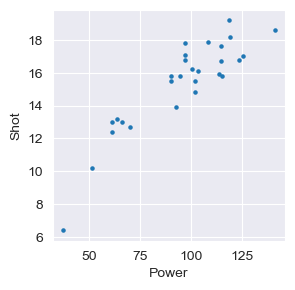

In [43]:
# step 1
ax = shot.plot(kind='scatter', x='Power', y='Shot', figsize=(3,3), marker='.')
plt.show()

In [44]:
# step 2
shot_model = smf.ols('Shot ~ Power', data=shot).fit()
shot_model_quad = smf.ols('Shot ~ Power + I(Power**2)', data=shot).fit()

In [47]:
print(shot_model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.790   
Dependent Variable: Shot             AIC:                94.5707 
Date:               2023-08-10 19:53 BIC:                97.2351 
No. Observations:   28               Log-Likelihood:     -45.285 
Df Model:           1                F-statistic:        102.4   
Df Residuals:       26               Prob (F-statistic): 1.66e-10
R-squared:          0.797            Scale:              1.6014  
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    5.9596     0.9588    6.2155   0.0000   3.9887   7.9305
Power        0.0983     0.0097   10.1170   0.0000   0.0784   0.1183
-----------------------------------------------------------------
Omnibus:               1.383        Durbin-Watson:          1.236
Prob(Omnibus):   

In [48]:
print(shot_model_quad.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.858   
Dependent Variable: Shot             AIC:                84.4368 
Date:               2023-08-10 19:53 BIC:                88.4334 
No. Observations:   28               Log-Likelihood:     -39.218 
Df Model:           2                F-statistic:        82.68   
Df Residuals:       25               Prob (F-statistic): 9.54e-12
R-squared:          0.869            Scale:              1.0798  
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -1.5318   2.1814 -0.7022 0.4890 -6.0245  2.9609
Power              0.2827   0.0507  5.5763 0.0000  0.1783  0.3871
I(Power ** 2)     -0.0010   0.0003 -3.6825 0.0011 -0.0016 -0.0005
-----------------------------------------------------------------
Omnibus:              1.322

In [49]:
x_rng = np.linspace(shot['Power'].min(), shot['Power'].max(), 1000)
df = pd.DataFrame({'Power':x_rng})
df['lin_pred'] = shot_model.predict(df)
df['quad_pred'] = shot_model_quad.predict(df)

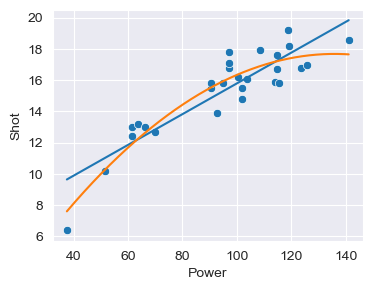

In [50]:
fig, ax = plt.subplots(figsize=(4,3))
sns.scatterplot(data=shot, x='Power', y='Shot', ax=ax)
sns.lineplot(data=df, x='Power', y='lin_pred', ax=ax)
sns.lineplot(data=df, x='Power', y='quad_pred', ax=ax)
plt.show()

In [51]:
# Interaction Terms
# Frequency Spectrum Example
spec = pd.read_csv('Spectrum.csv')

In [52]:
spec.describe()

,power_spectrum,frequency,force
count,30.000000,30.000000,30.000000
mean,93.701667,5.000000,5.350000
std,57.608593,1.893728,2.916865
min,14.650000,1.000000,0.900000
25%,50.262500,4.250000,2.850000
50%,79.150000,5.500000,6.000000
75%,142.125000,6.000000,7.750000
max,211.600000,8.000000,10.000000


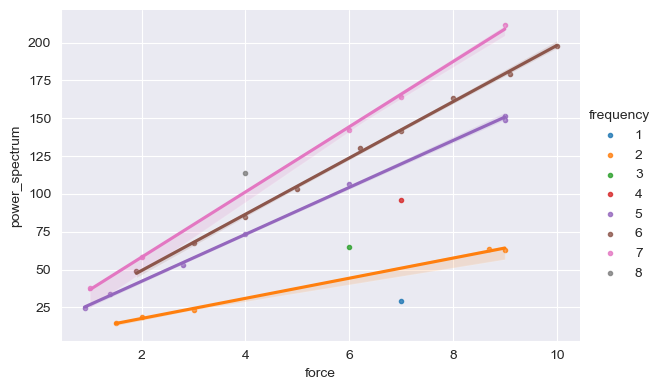

In [53]:
sns.lmplot(data=spec, x='force', y='power_spectrum', hue='frequency', aspect=1.5, height=4, markers='.')
plt.show()

In [54]:
spec_model = smf.ols('power_spectrum ~ force * frequency', data=spec).fit()
print(spec_model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.999    
Dependent Variable: power_spectrum   AIC:                118.1038 
Date:               2023-08-10 20:03 BIC:                123.7086 
No. Observations:   30               Log-Likelihood:     -55.052  
Df Model:           3                F-statistic:        1.209e+04
Df Residuals:       26               Prob (F-statistic): 5.48e-41 
R-squared:          0.999            Scale:              2.6521   
-------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
-------------------------------------------------------------------
Intercept        0.6278    1.8089   0.3471  0.7313  -3.0905  4.3462
force            0.6965    0.2987   2.3316  0.0277   0.0825  1.3106
frequency        2.0439    0.3410   5.9937  0.0000   1.3430  2.7449
force:frequency  2.9706    0.0569  52.2116  0.0000   2.8537  3.0876
------

In [56]:
spec_model = smf.ols('power_spectrum ~ force * frequency - 1', data=spec).fit()
print(spec_model.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 1.000    
Dependent Variable:     power_spectrum   AIC:                         116.2425 
Date:                   2023-08-10 20:05 BIC:                         120.4461 
No. Observations:       30               Log-Likelihood:              -55.121  
Df Model:               3                F-statistic:                 4.672e+04
Df Residuals:           27               Prob (F-statistic):          2.97e-50 
R-squared (uncentered): 1.000            Scale:                       2.5657   
----------------------------------------------------------------------------------
                       Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
----------------------------------------------------------------------------------
force                  0.7880      0.1384     5.6924    0.0000    0.5039    1.0720
frequency              2.1549      0.1167    18.4589

### Progress Check

In [57]:
df = pd.read_csv('UScrime.csv')
model = smf.ols('Crime ~ Ed + Po1 * Ineq',data=df).fit()
print(model.summary2(alpha=.1))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.687   
Dependent Variable: Crime            AIC:                643.4757
Date:               2023-08-10 20:07 BIC:                652.7265
No. Observations:   47               Log-Likelihood:     -316.74 
Df Model:           4                F-statistic:        26.29   
Df Residuals:       42               Prob (F-statistic): 5.88e-11
R-squared:          0.715            Scale:              46761.  
-----------------------------------------------------------------
             Coef.    Std.Err.    t    P>|t|    [0.05     0.95]  
-----------------------------------------------------------------
Intercept  -1458.1921 987.6747 -1.4764 0.1473 -3119.4139 203.0297
Ed           118.0232  46.9644  2.5130 0.0159    39.0313 197.0152
Po1          -54.5669  68.0724 -0.8016 0.4273  -169.0614  59.9276
Ineq          -4.6027  32.8592 -0.1401 0.8893   -59.8702  50.6648
Po1:Ineq      10.5951   3.9

In [58]:
pred = pd.DataFrame({'Ed':[10],'Po1':[7],'Ineq':[20],'Wealth':[5000]})
pred = pred.join(model.get_prediction(pred).summary_frame(alpha=.1))
pred

,Ed,Po1,Ineq,Wealth,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,10,7,20,5000,731.331013,46.094686,653.801947,808.860079,359.448796,1103.213229


***
# Lesson 35 - Qualitative (Categorical) Variables

In [59]:
iq = pd.read_csv('IQ.csv')
iq.head(1)

,Student,Test,IQ,Gender
0,1,93,125,Male


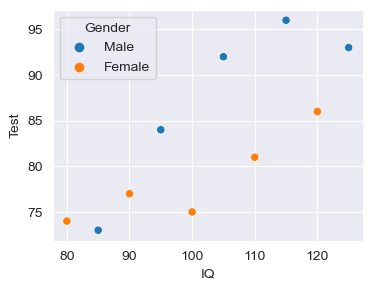

In [60]:
fig, ax = plt.subplots(figsize=(4,3))
sns.scatterplot(data=iq, x='IQ', y='Test', hue='Gender', ax=ax)
plt.show()

In [61]:
iq_model = smf.ols('Test ~ IQ + C(Gender)', data=iq).fit()
iq_model.summary2()

c:\Users\elder\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.756  
Dependent Variable: Test             AIC:                59.4259
Date:               2023-08-10 20:33 BIC:                60.3336
No. Observations:   10               Log-Likelihood:     -26.713
Df Model:           2                F-statistic:        14.94  
Df Residuals:       7                Prob (F-statistic): 0.00298
R-squared:          0.810            Scale:              17.486 
----------------------------------------------------------------
                   Coef.  Std.Err.   t    P>|t|   [0.025  0.975]
----------------------------------------------------------------
Intercept         38.6000   9.5355 4.0480 0.0049 16.0521 61.1479
C(Gender)[T.Male]  7.0000   2.6857 2.6064 0.0351  0.6494 13.3506
IQ                 0.4000   0.0935 4.2779 0.0037  0.1789  0.6211
----------------------------------------------------------------
Omnibus:              0.543        Durbin-Watson:          2.990
Prob(Omnibus):        0.762        Jarque-Bera (JB):       0.555
Skew:                 -0.309       Prob(JB):               0.758
Kurtosis:             2.025        Condition No.:          746  
================================================================

"""

In [62]:
iq_model = smf.ols('Test ~ IQ * C(Gender)', data=iq).fit()
iq_model.summary2()

c:\Users\elder\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:                OLS                Adj. R-squared:       0.782  
Dependent Variable:   Test               AIC:                  58.7432
Date:                 2023-08-10 20:35   BIC:                  59.9536
No. Observations:     10                 Log-Likelihood:       -25.372
Df Model:             3                  F-statistic:          11.78  
Df Residuals:         6                  Prob (F-statistic):   0.00631
R-squared:            0.855              Scale:                15.600 
----------------------------------------------------------------------
                      Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
----------------------------------------------------------------------
Intercept             50.6000  12.6143  4.0113 0.0070  19.7340 81.4660
C(Gender)[T.Male]    -17.6000  18.2820 -0.9627 0.3729 -62.3343 27.1343
IQ                     0.2800   0.1249  2.2418 0.0662  -0.0256  0.5856
IQ:C(Gender)[T.Male]   0.2400   0.1766  1.3587 0.2231  -0.1922  0.6722
----------------------------------------------------------------------
Omnibus:                1.270          Durbin-Watson:            2.474
Prob(Omnibus):          0.530          Jarque-Bera (JB):         0.839
Skew:                   -0.402         Prob(JB):                 0.657
Kurtosis:               1.831          Condition No.:            1983 
======================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [64]:
fev = pd.read_csv('FEV.dat', sep='\s+')

In [65]:
fev.head()

,Obs,patient,base,drug,hour,fev
0,1,1,2.46,A,1,2.68
1,2,2,3.50,A,1,3.95
2,3,3,1.96,A,1,2.28
3,4,4,3.44,A,1,4.08
4,5,5,2.80,A,1,4.09


In [66]:
fev['change'] = fev['fev'] - fev['base']

In [67]:
fev['drug'].value_counts()

drug
A    192
C    192
P    192
Name: count, dtype: int64

In [68]:
fev['hour'].value_counts()

hour
1    72
2    72
3    72
4    72
5    72
6    72
7    72
8    72
Name: count, dtype: int64

In [69]:
fev_model = smf.ols('change ~ C(drug) + C(hour)',data=fev).fit()

In [70]:
fev_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.200   
Dependent Variable: change           AIC:                897.7032
Date:               2023-08-10 20:39 BIC:                941.2643
No. Observations:   576              Log-Likelihood:     -438.85 
Df Model:           9                F-statistic:        17.02   
Df Residuals:       566              Prob (F-statistic): 5.74e-25
R-squared:          0.213            Scale:              0.27347 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      0.6970    0.0689  10.1150  0.0000   0.5616   0.8323
C(drug)[T.C]   0.2283    0.0534   4.2771  0.0000   0.1234   0.3331
C(drug)[T.P]  -0.2783    0.0534  -5.2149  0.0000  -0.3832  -0.1735
C(hour)[T.2]  -0.0251    0.0872  -0.2884  0.7731  -0.1963   0.1461
C(hour)[T.3]  -0.1107    0.0872  -1.2701  0.2046  -0.2819   0.0605
C(hour)[T.4]  -0.2100    0.0872  -2.4094  0.0163  -0.3812  -0.0388
C(hour)[T.5]  -0.3067    0.0872  -3.5186  0.0005  -0.4779  -0.1355
C(hour)[T.6]  -0.3704    0.0872  -4.2500  0.0000  -0.5416  -0.1992
C(hour)[T.7]  -0.4538    0.0872  -5.2061  0.0000  -0.6249  -0.2826
C(hour)[T.8]  -0.4636    0.0872  -5.3193  0.0000  -0.6348  -0.2924
-----------------------------------------------------------------
Omnibus:              21.120       Durbin-Watson:          1.919 
Prob(Omnibus):        0.000        Jarque-Bera (JB):       22.585
Skew:                 0.482        Prob(JB):               0.000 
Kurtosis:             3.102        Condition No.:          10    
=================================================================

"""

In [71]:
fev_model = smf.ols('change ~ C(drug) + hour',data=fev).fit()
fev_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.207   
Dependent Variable: change           AIC:                887.0167
Date:               2023-08-10 20:40 BIC:                904.4411
No. Observations:   576              Log-Likelihood:     -439.51 
Df Model:           3                F-statistic:        51.05   
Df Residuals:       572              Prob (F-statistic): 3.02e-29
R-squared:          0.211            Scale:              0.27122 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      0.7900    0.0568  13.9031  0.0000   0.6784   0.9016
C(drug)[T.C]   0.2283    0.0532   4.2948  0.0000   0.1239   0.3327
C(drug)[T.P]  -0.2783    0.0532  -5.2365  0.0000  -0.3827  -0.1739
hour          -0.0746    0.0095  -7.8744  0.0000  -0.0932  -0.0560
-----------------------------------------------------------------
Omnibus:              21.105       Durbin-Watson:          1.915 
Prob(Omnibus):        0.000        Jarque-Bera (JB):       22.584
Skew:                 0.483        Prob(JB):               0.000 
Kurtosis:             3.094        Condition No.:          18    
=================================================================

"""

In [72]:
fev_model = smf.ols('change ~ C(drug) * hour',data=fev).fit()
fev_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.230   
Dependent Variable: change           AIC:                871.8343
Date:               2023-08-10 20:40 BIC:                897.9709
No. Observations:   576              Log-Likelihood:     -429.92 
Df Model:           5                F-statistic:        35.42   
Df Residuals:       570              Prob (F-statistic): 1.40e-31
R-squared:          0.237            Scale:              0.26325 
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          0.8592   0.0816 10.5288 0.0000  0.6989  1.0195
C(drug)[T.C]       0.3423   0.1154  2.9658 0.0031  0.1156  0.5690
C(drug)[T.P]      -0.6000   0.1154 -5.1987 0.0000 -0.8267 -0.3733
hour              -0.0900   0.0162 -5.5663 0.0000 -0.1217 -0.0582
C(drug)[T.C]:hour -0.0253   0.0229 -1.1084 0.2681 -0.0702  0.0196
C(drug)[T.P]:hour  0.0715   0.0229  3.1275 0.0019  0.0266  0.1164
-----------------------------------------------------------------
Omnibus:              20.648       Durbin-Watson:          1.978 
Prob(Omnibus):        0.000        Jarque-Bera (JB):       21.943
Skew:                 0.472        Prob(JB):               0.000 
Kurtosis:             3.153        Condition No.:          43    
=================================================================

"""

***
# Lesson 36 - Model Building

In [3]:
sat = pd.read_csv('patient.csv')

In [4]:
sat.head(1)

,Satisfaction,Age,Severity,Anxiety
0,48,50,51,2.3


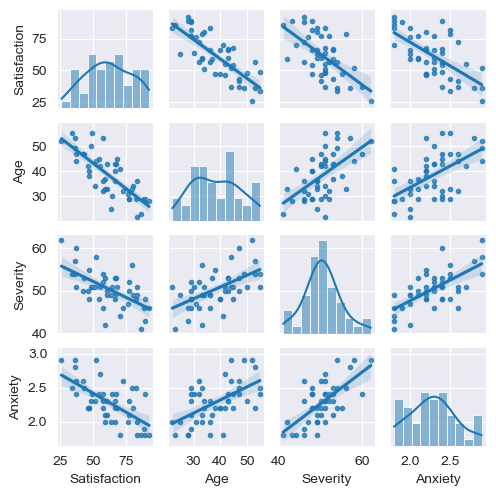

In [5]:
sns.pairplot(sat, diag_kws={'bins':10, 'kde':True}, height=1.25, markers='.', kind='reg')
plt.show()

In [6]:
# Train, test, validation split
from sklearn.model_selection import train_test_split
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [7]:
X_train, X_test, y_train, y_test = train_test_split(sat[['Age','Severity','Anxiety']], sat['Satisfaction'], test_size=0.33)

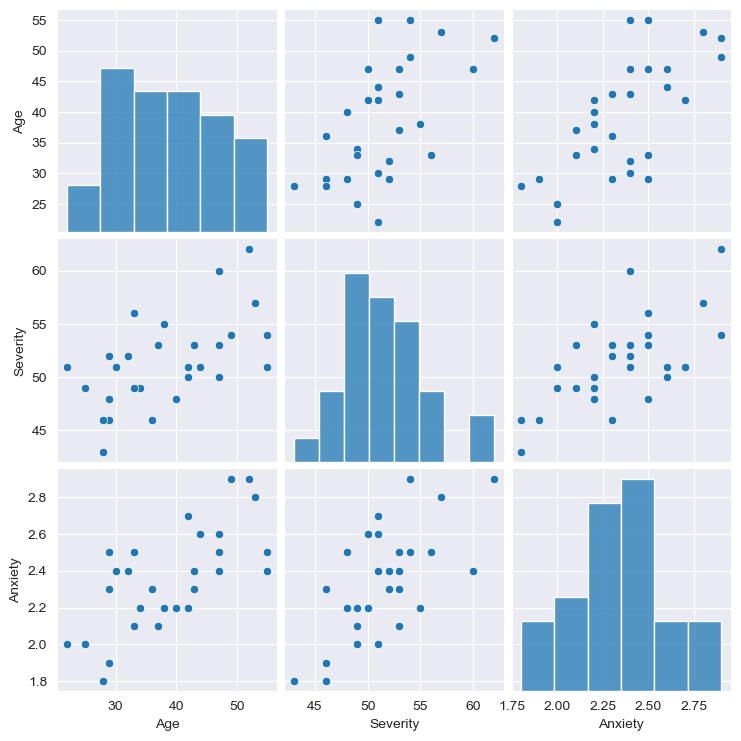

In [8]:
sns.pairplot(X_train)

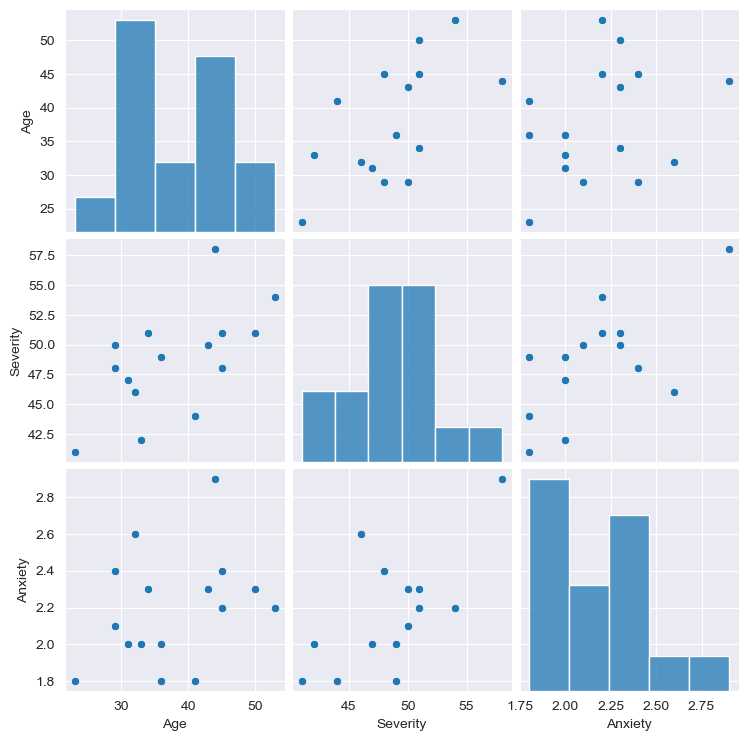

In [9]:
sns.pairplot(X_test)

<Axes: xlabel='Satisfaction', ylabel='Count'>

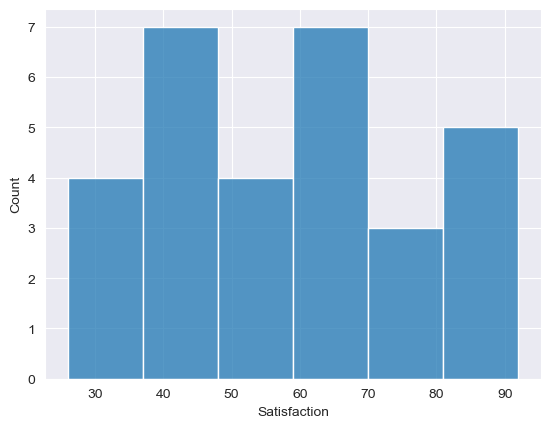

In [10]:
sns.histplot(y_train)

In [11]:
len(y_train)

30

<Axes: xlabel='Satisfaction', ylabel='Count'>

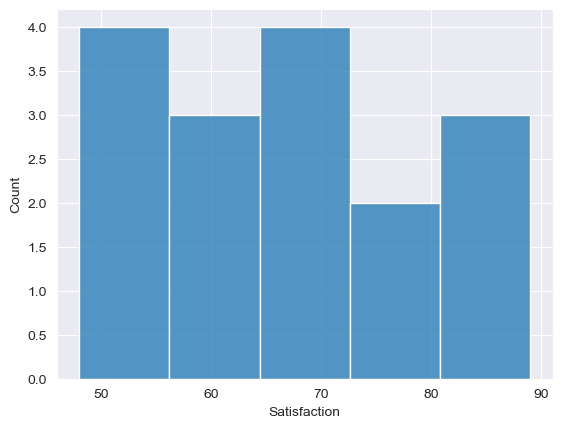

In [12]:
sns.histplot(y_test)

In [13]:
len(y_test)

16

In [14]:
# Stepwise Regression
# Backwards Elimination
formula = 'Satisfaction ~ Age * Severity * Anxiety + I(Age**2) + I(Severity**2) + I(Anxiety**2)'
sat_model = smf.ols(formula, data=sat).fit()
sat_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                 OLS                 Adj. R-squared:        0.713   
Dependent Variable:    Satisfaction        AIC:                   344.5178
Date:                  2023-08-11 15:45    BIC:                   364.6328
No. Observations:      46                  Log-Likelihood:        -161.26 
Df Model:              10                  F-statistic:           12.17   
Df Residuals:          35                  Prob (F-statistic):    1.04e-08
R-squared:             0.777               Scale:                 85.342  
--------------------------------------------------------------------------
                       Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
--------------------------------------------------------------------------
Intercept             532.6172 504.9828  1.0547 0.2988 -492.5524 1557.7867
Age                   -13.6594  12.1763 -1.1218 0.2696  -38.3787   11.0599
Severity                3.9741  12.4439  0.3194 0.7514  -21.2884   29.2366
Age:Severity            0.3659   0.2522  1.4510 0.1557   -0.1461    0.8779
Anxiety              -458.2636 244.4149 -1.8749 0.0692 -954.4522   37.9250
Age:Anxiety             1.6796   5.3944  0.3114 0.7574   -9.2716   12.6309
Severity:Anxiety        7.2806   5.0184  1.4508 0.1557   -2.9074   17.4685
Age:Severity:Anxiety   -0.1120   0.1063 -1.0538 0.2992   -0.3279    0.1038
I(Age ** 2)             0.0399   0.0248  1.6118 0.1160   -0.0104    0.0902
I(Severity ** 2)       -0.2443   0.1290 -1.8935 0.0666   -0.5063    0.0176
I(Anxiety ** 2)        50.1010  26.7188  1.8751 0.0691   -4.1410  104.3430
--------------------------------------------------------------------------
Omnibus:                2.542           Durbin-Watson:             2.017  
Prob(Omnibus):          0.281           Jarque-Bera (JB):          1.503  
Skew:                   -0.140          Prob(JB):                  0.472  
Kurtosis:               2.160           Condition No.:             2482214
==========================================================================
* The condition number is large (2e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

In [15]:
formula = 'Satisfaction ~ Age * Severity * Anxiety + I(Age**2) + I(Severity**2) + I(Anxiety**2) ' + \
          '- Age:Severity:Anxiety'
sat_model = smf.ols(formula, data=sat).fit()
sat_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:                OLS               Adj. R-squared:      0.712   
Dependent Variable:   Satisfaction      AIC:                 343.9546
Date:                 2023-08-11 15:47  BIC:                 362.2410
No. Observations:     46                Log-Likelihood:      -161.98 
Df Model:             9                 F-statistic:         13.35   
Df Residuals:         36                Prob (F-statistic):  4.56e-09
R-squared:            0.769             Scale:               85.604  
---------------------------------------------------------------------
                   Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
---------------------------------------------------------------------
Intercept          22.4356 143.8107  0.1560 0.8769 -269.2260 314.0972
Age                -1.3081   3.3045 -0.3959 0.6945   -8.0100   5.3938
Severity           14.1587   7.8507  1.8035 0.0797   -1.7633  30.0807
Age:Severity        0.1159   0.0857  1.3529 0.1845   -0.0579   0.2897
Anxiety          -218.7005  89.9038 -2.4326 0.0201 -401.0339 -36.3671
Age:Anxiety        -3.8719   1.1622 -3.3315 0.0020   -6.2289  -1.5148
Severity:Anxiety    2.7728   2.6282  1.0550 0.2984   -2.5574   8.1030
I(Age ** 2)         0.0399   0.0248  1.6082 0.1165   -0.0104   0.0902
I(Severity ** 2)   -0.2479   0.1292 -1.9187 0.0630   -0.5099   0.0141
I(Anxiety ** 2)    46.0881  26.4866  1.7401 0.0904   -7.6292  99.8054
---------------------------------------------------------------------
Omnibus:                1.106         Durbin-Watson:           2.090 
Prob(Omnibus):          0.575         Jarque-Bera (JB):        0.947 
Skew:                   -0.097        Prob(JB):                0.623 
Kurtosis:               2.325         Condition No.:           388538
=====================================================================
* The condition number is large (4e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [16]:
formula = 'Satisfaction ~ Age * Severity * Anxiety + I(Age**2) + I(Severity**2) + I(Anxiety**2) ' + \
        '- Age:Severity:Anxiety - Severity:Anxiety'
sat_model = smf.ols(formula, data=sat).fit()
sat_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:                OLS               Adj. R-squared:      0.711   
Dependent Variable:   Satisfaction      AIC:                 343.3553
Date:                 2023-08-11 15:48  BIC:                 359.8131
No. Observations:     46                Log-Likelihood:      -162.68 
Df Model:             8                 F-statistic:         14.84   
Df Residuals:         37                Prob (F-statistic):  1.90e-09
R-squared:            0.762             Scale:               85.866  
---------------------------------------------------------------------
                   Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
---------------------------------------------------------------------
Intercept          33.9842 143.6124  0.2366 0.8142 -257.0022 324.9707
Age                -1.4597   3.3064 -0.4415 0.6614   -8.1592   5.2397
Severity           11.6762   7.5012  1.5566 0.1281   -3.5227  26.8752
Age:Severity        0.1034   0.0850  1.2161 0.2317   -0.0689   0.2756
Anxiety          -171.4588  78.0783 -2.1960 0.0344 -329.6606 -13.2571
Age:Anxiety        -3.4734   1.1008 -3.1554 0.0032   -5.7038  -1.2430
I(Age ** 2)         0.0388   0.0248  1.5608 0.1271   -0.0116   0.0891
I(Severity ** 2)   -0.1557   0.0953 -1.6336 0.1108   -0.3488   0.0374
I(Anxiety ** 2)    62.6866  21.3403  2.9375 0.0057   19.4471 105.9261
---------------------------------------------------------------------
Omnibus:               0.949         Durbin-Watson:            1.951 
Prob(Omnibus):         0.622         Jarque-Bera (JB):         0.874 
Skew:                  0.097         Prob(JB):                 0.646 
Kurtosis:              2.353         Condition No.:            387355
=====================================================================
* The condition number is large (4e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [17]:
formula = 'Satisfaction ~ Age * Severity * Anxiety + I(Age**2) + I(Severity**2) + I(Anxiety**2)' + \
          ' - Age:Severity:Anxiety - Severity:Anxiety - Age:Severity'
sat_model = smf.ols(formula, data=sat).fit()
sat_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:                OLS               Adj. R-squared:      0.707   
Dependent Variable:   Satisfaction      AIC:                 343.1581
Date:                 2023-08-11 15:48  BIC:                 357.7873
No. Observations:     46                Log-Likelihood:      -163.58 
Df Model:             7                 F-statistic:         16.54   
Df Residuals:         38                Prob (F-statistic):  8.83e-10
R-squared:            0.753             Scale:               86.948  
---------------------------------------------------------------------
                   Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
---------------------------------------------------------------------
Intercept         111.2022 129.6217  0.8579 0.3963 -151.2032 373.6076
Age                 1.8400   1.9014  0.9677 0.3393   -2.0091   5.6891
Severity            6.3990   6.1570  1.0393 0.3052   -6.0652  18.8632
Anxiety          -177.4011  78.4148 -2.2623 0.0295 -336.1435 -18.6587
Age:Anxiety        -3.0062   1.0381 -2.8960 0.0062   -5.1076  -0.9048
I(Age ** 2)         0.0502   0.0231  2.1693 0.0364    0.0034   0.0970
I(Severity ** 2)   -0.0653   0.0600 -1.0880 0.2835   -0.1868   0.0562
I(Anxiety ** 2)    60.2740  21.3813  2.8190 0.0076   16.9897 103.5582
---------------------------------------------------------------------
Omnibus:               1.392         Durbin-Watson:            2.049 
Prob(Omnibus):         0.499         Jarque-Bera (JB):         1.041 
Skew:                  0.054         Prob(JB):                 0.594 
Kurtosis:              2.271         Condition No.:            289535
=====================================================================
* The condition number is large (3e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [18]:
formula = 'Satisfaction ~ Age * Severity * Anxiety + I(Age**2) + I(Anxiety**2)' + \
          ' - Age:Severity:Anxiety - Severity:Anxiety - Age:Severity'
sat_model = smf.ols(formula, data=sat).fit()
sat_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:               OLS               Adj. R-squared:      0.706   
Dependent Variable:  Satisfaction      AIC:                 342.5691
Date:                2023-08-11 15:49  BIC:                 355.3696
No. Observations:    46                Log-Likelihood:      -164.28 
Df Model:            6                 F-statistic:         19.01   
Df Residuals:        39                Prob (F-statistic):  3.34e-10
R-squared:           0.745             Scale:               87.358  
--------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
--------------------------------------------------------------------
Intercept        229.0891  71.3050  3.2128 0.0026   84.8610 373.3171
Age                2.1686   1.8816  1.1525 0.2561   -1.6373   5.9746
Severity          -0.2806   0.4633 -0.6057 0.5482   -1.2178   0.6565
Anxiety         -137.7785  69.6075 -1.9794 0.0549 -278.5729   3.0159
Age:Anxiety       -3.1444   1.0327 -3.0450 0.0042   -5.2332  -1.0557
I(Age ** 2)        0.0500   0.0232  2.1574 0.0372    0.0031   0.0969
I(Anxiety ** 2)   52.9565  20.3436  2.6031 0.0130   11.8076  94.1053
--------------------------------------------------------------------
Omnibus:                2.952        Durbin-Watson:           2.065 
Prob(Omnibus):          0.229        Jarque-Bera (JB):        1.541 
Skew:                   0.066        Prob(JB):                0.463 
Kurtosis:               2.113        Condition No.:           120259
====================================================================
* The condition number is large (1e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [19]:
formula = 'Satisfaction ~ Age * Anxiety + I(Age**2) + I(Anxiety**2)'
sat_model = smf.ols(formula, data=sat).fit()
sat_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:               OLS               Adj. R-squared:      0.711   
Dependent Variable:  Satisfaction      AIC:                 340.9998
Date:                2023-08-11 15:50  BIC:                 351.9717
No. Observations:    46                Log-Likelihood:      -164.50 
Df Model:            5                 F-statistic:         23.10   
Df Residuals:        40                Prob (F-statistic):  7.78e-11
R-squared:           0.743             Scale:               85.975  
--------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
--------------------------------------------------------------------
Intercept        222.8420  69.9946  3.1837 0.0028   81.3776 364.3065
Age                2.3102   1.8522  1.2473 0.2195   -1.4332   6.0537
Anxiety         -144.3397  68.2131 -2.1160 0.0406 -282.2036  -6.4758
Age:Anxiety       -3.2188   1.0172 -3.1644 0.0030   -5.2747  -1.1630
I(Age ** 2)        0.0499   0.0230  2.1706 0.0360    0.0034   0.0964
I(Anxiety ** 2)   54.5451  20.0135  2.7254 0.0095   14.0962  94.9940
--------------------------------------------------------------------
Omnibus:                3.373        Durbin-Watson:           2.112 
Prob(Omnibus):          0.185        Jarque-Bera (JB):        1.629 
Skew:                   0.024        Prob(JB):                0.443 
Kurtosis:               2.079        Condition No.:           120210
====================================================================
* The condition number is large (1e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [20]:
formula = 'Satisfaction ~ Age * Anxiety + I(Anxiety**2)'
sat_model = smf.ols(formula, data=sat).fit()
sat_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:               OLS               Adj. R-squared:      0.684   
Dependent Variable:  Satisfaction      AIC:                 344.1222
Date:                2023-08-11 15:51  BIC:                 353.2654
No. Observations:    46                Log-Likelihood:      -167.06 
Df Model:            4                 F-statistic:         25.40   
Df Residuals:        41                Prob (F-statistic):  1.25e-10
R-squared:           0.712             Scale:               93.758  
--------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
--------------------------------------------------------------------
Intercept        188.6268  71.2167  2.6486 0.0114   44.8018 332.4519
Age                3.0007   1.9055  1.5748 0.1230   -0.8475   6.8489
Anxiety         -124.0647  70.5629 -1.7582 0.0862 -266.5694  18.4400
Age:Anxiety       -1.8207   0.8222 -2.2146 0.0324   -3.4811  -0.1603
I(Anxiety ** 2)   38.3677  19.3967  1.9781 0.0547   -0.8046  77.5401
--------------------------------------------------------------------
Omnibus:                7.207         Durbin-Watson:           2.266
Prob(Omnibus):          0.027         Jarque-Bera (JB):        2.511
Skew:                   -0.161        Prob(JB):                0.285
Kurtosis:               1.902         Condition No.:           7047 
====================================================================
* The condition number is large (7e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [21]:
# forward selection
formula = 'Satisfaction ~ '

In [23]:
for next_term in ['Age', 'Anxiety', 'Severity']:
    print(next_term + f': {smf.ols(formula + next_term, data=sat).fit().aic}')

Age: 351.0717358775494
Anxiety: 370.7560683875208
Severity: 374.6735470167797


In [24]:
formula = formula + 'Age'
for next_term in ['Anxiety','Severity','I(Age**2)']:
    print(next_term + f': {smf.ols(formula + " + " + next_term, data=sat).fit().aic}')

Anxiety: 345.6029992318705
Severity: 348.5099922822886
I(Age**2): 352.94617247180906


In [26]:
formula += ' + Anxiety'
for next_term in ['Severity','I(Age**2)','I(Anxiety**2)', 'Age:Anxiety']:
    print(next_term + f': {smf.ols(formula + " + " + next_term, data=sat).fit().aic}')

Severity: 346.7273072385829
I(Age**2): 347.50338094627887
I(Anxiety**2): 347.31954893916327
Age:Anxiety: 346.31502303453027


In [27]:
formula += ' + Age:Anxiety'
for next_term in ['Severity','I(Age**2)','I(Anxiety**2)']:
    print(next_term + f': {smf.ols(formula + " + " + next_term, data=sat).fit().aic}')

Severity: 347.5785229592517
I(Age**2): 346.8349963358556
I(Anxiety**2): 344.1221723290979


In [28]:
formula += ' + I(Anxiety**2)'
for next_term in ['Severity','I(Age**2)']:
    print(next_term + f': {smf.ols(formula + " + " + next_term, data=sat).fit().aic}')

Severity: 345.7551763300333
I(Age**2): 340.9998026522761


In [29]:
formula += ' + I(Age**2)'
for next_term in ['Severity']:
    print(next_term + f': {smf.ols(formula + " + " + next_term, data=sat).fit().aic}')

Severity: 342.569086577594


In [30]:
formula

'Satisfaction ~ Age + Anxiety + Anxiety + Age:Anxiety + I(Anxiety**2) + I(Age**2)'

In [31]:
sat_model = smf.ols(formula,data=sat).fit()
sat_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:               OLS               Adj. R-squared:      0.711   
Dependent Variable:  Satisfaction      AIC:                 340.9998
Date:                2023-08-11 16:02  BIC:                 351.9717
No. Observations:    46                Log-Likelihood:      -164.50 
Df Model:            5                 F-statistic:         23.10   
Df Residuals:        40                Prob (F-statistic):  7.78e-11
R-squared:           0.743             Scale:               85.975  
--------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
--------------------------------------------------------------------
Intercept        222.8420  69.9946  3.1837 0.0028   81.3776 364.3065
Age                2.3102   1.8522  1.2473 0.2195   -1.4332   6.0537
Anxiety         -144.3397  68.2131 -2.1160 0.0406 -282.2036  -6.4758
Age:Anxiety       -3.2188   1.0172 -3.1644 0.0030   -5.2747  -1.1630
I(Anxiety ** 2)   54.5451  20.0135  2.7254 0.0095   14.0962  94.9940
I(Age ** 2)        0.0499   0.0230  2.1706 0.0360    0.0034   0.0964
--------------------------------------------------------------------
Omnibus:                3.373        Durbin-Watson:           2.112 
Prob(Omnibus):          0.185        Jarque-Bera (JB):        1.629 
Skew:                   0.024        Prob(JB):                0.443 
Kurtosis:               2.079        Condition No.:           120210
====================================================================
* The condition number is large (1e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [37]:
# Lasso and Ridge
# Typically we create an X DataFrame for the predictors and a y Series for the response
sat = pd.read_csv('patient.csv')  # To remove any changes we've made
X = sat.drop('Satisfaction',axis=1)
y = sat['Satisfaction']
X.head()

,Age,Severity,Anxiety
0,50,51,2.3
1,36,46,2.3
2,40,48,2.2
3,41,44,1.8
4,28,43,1.8


In [38]:
print(X.shape)
num_cols = X.shape[1]

(46, 3)


In [41]:
# Want to center, scale, and add higher-order terms
for col in X.columns:
    X[col] = stats.zscore(X[col])  # Centers and scales
X.head()

,Age,Severity,Anxiety
0,1.316086,0.132481,0.044056
1,-0.271104,-1.039464,0.044056
2,0.182379,-0.570686,-0.293705
3,0.295750,-1.508242,-1.644748
4,-1.178069,-1.742631,-1.644748


In [42]:
for ii in range(num_cols):
    name1 = X.columns[ii]
    X['I(' + name1 + '**2)'] = X[name1] ** 2
    for jj in range(ii+1,num_cols):
        name2 = X.columns[jj]
        col_name = name1 + ':' + name2
        X[col_name] = X[name1] * X[name2]
X.head()

,Age,Severity,Anxiety,I(Age**2),Age:Severity,Age:Anxiety,I(Severity**2),Severity:Anxiety,I(Anxiety**2)
0,1.316086,0.132481,0.044056,1.732081,0.174356,0.057981,0.017551,0.005837,0.001941
1,-0.271104,-1.039464,0.044056,0.073497,0.281803,-0.011944,1.080486,-0.045794,0.001941
2,0.182379,-0.570686,-0.293705,0.033262,-0.104081,-0.053566,0.325683,0.167613,0.086263
3,0.295750,-1.508242,-1.644748,0.087468,-0.446062,-0.486434,2.274795,2.480679,2.705197
4,-1.178069,-1.742631,-1.644748,1.387847,2.052940,1.937627,3.036764,2.866190,2.705197


In [43]:
# Ridge Regression
from sklearn.linear_model import Ridge

In [44]:
alpha = 10
ridge_model = Ridge(alpha=alpha, fit_intercept=True)
ridge_model.fit(X,y)

Ridge(alpha=10)

In [45]:
ridge_model.coef_

array([-8.17686321, -2.15028655, -4.14945761,  1.38279938,  0.64196495,
       -3.57146574, -1.55116522,  0.79967904,  2.11238638])

In [46]:
ridge_coef = pd.DataFrame({'term':X.columns,'coef':ridge_model.coef_})
ridge_coef['abs_coef'] = np.abs(ridge_coef['coef'])
ridge_coef.sort_values('abs_coef', ascending=False)

,term,coef,abs_coef
0,Age,-8.176863,8.176863
2,Anxiety,-4.149458,4.149458
5,Age:Anxiety,-3.571466,3.571466
1,Severity,-2.150287,2.150287
8,I(Anxiety**2),2.112386,2.112386
6,I(Severity**2),-1.551165,1.551165
3,I(Age**2),1.382799,1.382799
7,Severity:Anxiety,0.799679,0.799679
4,Age:Severity,0.641965,0.641965


In [47]:
alpha_rng = np.linspace(0,10,101)
df = pd.DataFrame(columns=X.columns)
for alpha in alpha_rng:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X, y)
    df.loc[alpha] = np.abs(ridge_model.coef_)

In [48]:
df

,Age,Severity,Anxiety,I(Age**2),Age:Severity,Age:Anxiety,I(Severity**2),Severity:Anxiety,I(Anxiety**2)
0.0,11.037912,0.221435,4.944271,3.105096,4.362976,10.111463,4.511843,3.502435,4.039898
0.1,10.982028,0.273496,4.927308,3.072765,4.231912,9.929165,4.407303,3.400912,4.007309
0.2,10.927643,0.323726,4.910748,3.040925,4.107007,9.753616,4.307815,3.304640,3.974843
0.3,10.874668,0.372228,4.894577,3.009572,3.987854,9.584424,4.213033,3.213237,3.942544
0.4,10.823022,0.419097,4.878785,2.978704,3.874077,9.421227,4.122638,3.126358,3.910447
...,...,...,...,...,...,...,...,...,...
9.6,8.246559,2.122090,4.166576,1.418688,0.680481,3.668154,1.583693,0.827022,2.153663
9.7,8.228963,2.129294,4.162253,1.409579,0.670611,3.643510,1.575376,0.820024,2.143190
9.8,8.211483,2.136393,4.157960,1.400563,0.660904,3.619184,1.567184,0.813136,2.132820
9.9,8.194117,2.143390,4.153695,1.391637,0.651356,3.595172,1.559114,0.806355,2.122553


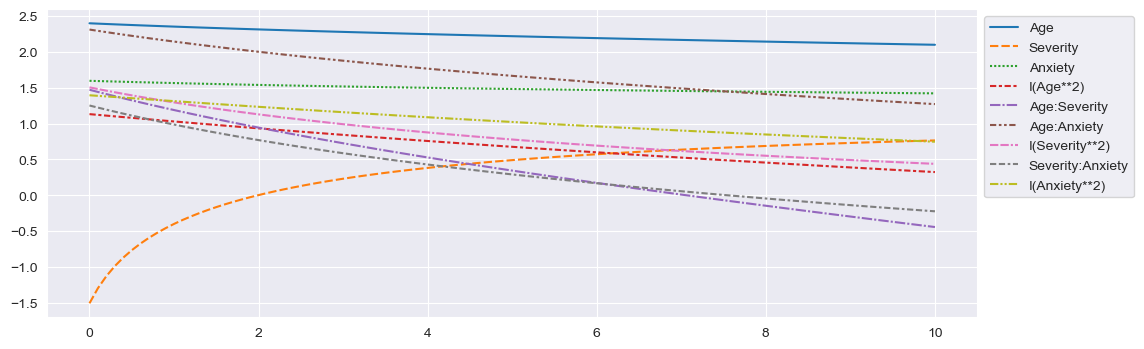

In [49]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=np.log(df), ax=ax)
ax.legend(bbox_to_anchor=(1,1))
plt.show()

In [50]:
sat_model = smf.ols('Satisfaction ~ Age * Anxiety + I(Anxiety**2)', data=sat).fit()
sat_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:               OLS               Adj. R-squared:      0.684   
Dependent Variable:  Satisfaction      AIC:                 344.1222
Date:                2023-08-11 16:26  BIC:                 353.2654
No. Observations:    46                Log-Likelihood:      -167.06 
Df Model:            4                 F-statistic:         25.40   
Df Residuals:        41                Prob (F-statistic):  1.25e-10
R-squared:           0.712             Scale:               93.758  
--------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
--------------------------------------------------------------------
Intercept        188.6268  71.2167  2.6486 0.0114   44.8018 332.4519
Age                3.0007   1.9055  1.5748 0.1230   -0.8475   6.8489
Anxiety         -124.0647  70.5629 -1.7582 0.0862 -266.5694  18.4400
Age:Anxiety       -1.8207   0.8222 -2.2146 0.0324   -3.4811  -0.1603
I(Anxiety ** 2)   38.3677  19.3967  1.9781 0.0547   -0.8046  77.5401
--------------------------------------------------------------------
Omnibus:                7.207         Durbin-Watson:           2.266
Prob(Omnibus):          0.027         Jarque-Bera (JB):        2.511
Skew:                   -0.161        Prob(JB):                0.285
Kurtosis:               1.902         Condition No.:           7047 
====================================================================
* The condition number is large (7e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [51]:
# LASSO
from sklearn.linear_model import Lasso

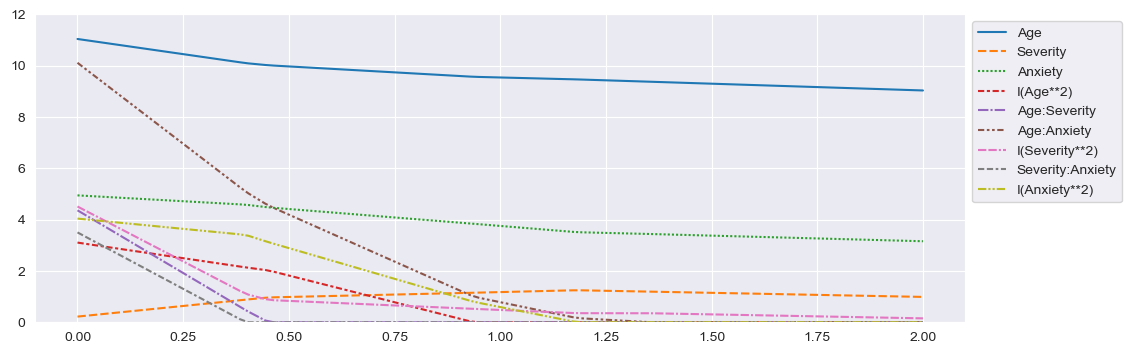

In [52]:
alpha_rng = np.linspace(0.0001,2,100)
df = pd.DataFrame({'alpha':alpha_rng}, columns=X.columns)
for alpha in alpha_rng:
    lasso_model = Lasso(alpha=alpha, max_iter = 10000)
    lasso_model.fit(X, y)
    df.loc[alpha] = (lasso_model.coef_)
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=np.abs(df), ax=ax)
ax.legend(bbox_to_anchor=(1,1))
ax.set_ylim(0,12)
plt.show()

In [53]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X,y)
pd.DataFrame({'terms':X.columns, 'coef':lasso_model.coef_}).sort_values('coef')

,terms,coef
0,Age,-9.537719
2,Anxiety,-3.753351
1,Severity,-1.176191
5,Age:Anxiety,-0.782983
6,I(Severity**2),-0.480133
3,I(Age**2),0.000000
4,Age:Severity,0.000000
7,Severity:Anxiety,0.000000
8,I(Anxiety**2),0.592921


In [56]:
model = smf.ols('Satisfaction ~ Age + Anxiety + Age:Anxiety + I(Anxiety**2)', data=sat).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:               OLS               Adj. R-squared:      0.684   
Dependent Variable:  Satisfaction      AIC:                 344.1222
Date:                2023-08-11 17:30  BIC:                 353.2654
No. Observations:    46                Log-Likelihood:      -167.06 
Df Model:            4                 F-statistic:         25.40   
Df Residuals:        41                Prob (F-statistic):  1.25e-10
R-squared:           0.712             Scale:               93.758  
--------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
--------------------------------------------------------------------
Intercept        188.6268  71.2167  2.6486 0.0114   44.8018 332.4519
Age                3.0007   1.9055  1.5748 0.1230   -0.8475   6.8489
Anxiety         -124.0647  70.5629 -1.7582 0.0862 -266.5694  18.4400
Age:Anxiety       -1.8207   0.8222 -2.2146 0.0324   -3.4811  -0.1603
I(Anxiety ** 2)   38.3677  19.3967  1.9781 0.0547   -0.8046  77.5401
--------------------------------------------------------------------
Omnibus:                7.207         Durbin-Watson:           2.266
Prob(Omnibus):          0.027         Jarque-Bera (JB):        2.511
Skew:                   -0.161        Prob(JB):                0.285
Kurtosis:               1.902         Condition No.:           7047 
====================================================================
* The condition number is large (7e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

### Progress Check

In [61]:
df = pd.read_csv('UScrime.csv')
df.describe()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
count,47.000000,47.000000,47.00000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,13.857447,0.340426,10.56383,8.500000,8.023404,0.561191,98.302128,36.617021,10.112766,0.095468,3.397872,5253.829787,19.400000,0.047091,26.597921,905.085106
std,1.256763,0.478975,1.11870,2.971897,2.796132,0.040412,2.946737,38.071188,10.282882,0.018029,0.844545,964.909442,3.989606,0.022737,7.086895,386.762697
min,11.900000,0.000000,8.70000,4.500000,4.100000,0.480000,93.400000,3.000000,0.200000,0.070000,2.000000,2880.000000,12.600000,0.006900,12.199600,342.000000
25%,13.000000,0.000000,9.75000,6.250000,5.850000,0.530500,96.450000,10.000000,2.400000,0.080500,2.750000,4595.000000,16.550000,0.032701,21.600350,658.500000
50%,13.600000,0.000000,10.80000,7.800000,7.300000,0.560000,97.700000,25.000000,7.600000,0.092000,3.400000,5370.000000,17.600000,0.042100,25.800600,831.000000
75%,14.600000,1.000000,11.45000,10.450000,9.700000,0.593000,99.200000,41.500000,13.250000,0.104000,3.850000,5915.000000,22.750000,0.054450,30.450750,1057.500000
max,17.700000,1.000000,12.20000,16.600000,15.700000,0.641000,107.100000,168.000000,42.300000,0.142000,5.800000,6890.000000,27.600000,0.119804,44.000400,1993.000000


In [62]:
df['MF'] = df['M.F']

In [63]:
formula =  'Crime ~ M + Ed + Po1 + MF + Wealth + Ineq + Time'
smf.ols(formula, data=df).fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:                OLS              Adj. R-squared:     0.694   
Dependent Variable:   Crime            AIC:                644.9768
Date:                 2023-08-11 17:44 BIC:                659.7780
No. Observations:     47               Log-Likelihood:     -314.49 
Df Model:             7                F-statistic:        15.91   
Df Residuals:         39               Prob (F-statistic): 1.15e-09
R-squared:            0.741            Scale:              45761.  
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept -6799.1449 1383.9618 -4.9128 0.0000 -9598.4719 -3999.8180
M            76.6240   35.3033  2.1704 0.0361     5.2163   148.0316
Ed          125.3509   52.1830  2.4021 0.0212    19.8008   230.9010
Po1         110.1374   18.0469  6.1029 0.0000    73.6342   146.6407
MF           19.6773   13.6607  1.4404 0.1577    -7.9540    47.3086
Wealth        0.1461    0.0988  1.4793 0.1471    -0.0537     0.3459
Ineq         78.5707   19.0832  4.1173 0.0002    39.9713   117.1700
Time          5.8572    5.2423  1.1173 0.2707    -4.7463    16.4608
-------------------------------------------------------------------
Omnibus:              0.036         Durbin-Watson:           1.751 
Prob(Omnibus):        0.982         Jarque-Bera (JB):        0.201 
Skew:                 -0.045        Prob(JB):                0.905 
Kurtosis:             2.693         Condition No.:           236897
===================================================================
* The condition number is large (2e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [64]:
formula =  'Crime ~ M + Ed + Po1 + MF + Wealth + Ineq'
smf.ols(formula, data=df).fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:                OLS              Adj. R-squared:     0.692   
Dependent Variable:   Crime            AIC:                644.4577
Date:                 2023-08-11 17:44 BIC:                657.4087
No. Observations:     47               Log-Likelihood:     -315.23 
Df Model:             6                F-statistic:        18.24   
Df Residuals:         40               Prob (F-statistic): 4.57e-10
R-squared:            0.732            Scale:              46045.  
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept -6322.9530 1320.7833 -4.7873 0.0000 -8992.3557 -3653.5503
M            84.4116   34.7157  2.4315 0.0196    14.2486   154.5745
Ed          118.3794   51.9692  2.2779 0.0282    13.3457   223.4131
Po1         110.7998   18.0930  6.1239 0.0000    74.2324   147.3672
MF           14.0778   12.7475  1.1044 0.2760   -11.6860    39.8415
Wealth        0.1713    0.0965  1.7754 0.0834    -0.0237     0.3663
Ineq         81.5583   18.9535  4.3031 0.0001    43.2520   119.8647
-------------------------------------------------------------------
Omnibus:               0.213        Durbin-Watson:           1.692 
Prob(Omnibus):         0.899        Jarque-Bera (JB):        0.034 
Skew:                  0.065        Prob(JB):                0.983 
Kurtosis:              2.989        Condition No.:           225385
===================================================================
* The condition number is large (2e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [65]:
formula =  'Crime ~ M + Ed + Po1 + Wealth + Ineq'
smf.ols(formula, data=df).fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:                OLS              Adj. R-squared:     0.691   
Dependent Variable:   Crime            AIC:                643.8693
Date:                 2023-08-11 17:45 BIC:                654.9702
No. Observations:     47               Log-Likelihood:     -315.93 
Df Model:             5                F-statistic:        21.53   
Df Residuals:         41               Prob (F-statistic): 1.65e-10
R-squared:            0.724            Scale:              46292.  
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept -5422.2549 1041.6636 -5.2054 0.0000 -7525.9373 -3318.5725
M            90.7250   34.3333  2.6425 0.0116    21.3875   160.0624
Ed          145.8304   45.7611  3.1868 0.0028    53.4140   238.2468
Po1         108.4247   18.0128  6.0193 0.0000    72.0471   144.8023
Wealth        0.1810    0.0963  1.8786 0.0674    -0.0136     0.3755
Ineq         85.4229   18.6774  4.5736 0.0000    47.7031   123.1427
-------------------------------------------------------------------
Omnibus:              0.120         Durbin-Watson:           1.781 
Prob(Omnibus):        0.942         Jarque-Bera (JB):        0.012 
Skew:                 -0.026        Prob(JB):                0.994 
Kurtosis:             2.942         Condition No.:           177324
===================================================================
* The condition number is large (2e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [66]:
formula =  'Crime ~ M + Ed + Po1 + Ineq'
smf.ols(formula, data=df).fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:               OLS              Adj. R-squared:     0.672   
Dependent Variable:  Crime            AIC:                645.7503
Date:                2023-08-11 17:45 BIC:                655.0011
No. Observations:    47               Log-Likelihood:     -317.88 
Df Model:            4                F-statistic:        24.55   
Df Residuals:        42               Prob (F-statistic): 1.59e-10
R-squared:           0.700            Scale:              49080.  
------------------------------------------------------------------
            Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
------------------------------------------------------------------
Intercept -4249.2222 858.5140 -4.9495 0.0000 -5981.7737 -2516.6707
M            76.0225  34.4213  2.2086 0.0327     6.5575   145.4874
Ed          166.0502  45.7970  3.6258 0.0008    73.6280   258.4723
Po1         129.8039  14.3768  9.0287 0.0000   100.7903   158.8175
Ineq         64.0913  15.2695  4.1973 0.0001    33.2762    94.9064
------------------------------------------------------------------
Omnibus:              1.809         Durbin-Watson:           2.012
Prob(Omnibus):        0.405         Jarque-Bera (JB):        0.950
Skew:                 -0.132        Prob(JB):                0.622
Kurtosis:             3.645         Condition No.:           733  
==================================================================

"""

In [96]:
formula = 'Crime ~ '

In [97]:
for next_term in ['M', 'Ed', 'Po1', 'MF', 'Wealth', 'Ineq', 'Time']:
    print(next_term + f': {smf.ols(formula + next_term, data=df).fit().bic}')

M: 699.7262260155027
Ed: 694.9310259371285
Po1: 670.0157608185124
MF: 697.9025404920336
Wealth: 689.9228964928196
Ineq: 698.5729963992084
Time: 699.0363423945574


In [98]:
formula += ' + Po1 '
for next_term in ['M', 'Ed', 'MF', 'Wealth', 'Ineq', 'Time']:
    print(next_term + f': {smf.ols(formula + " + " + next_term, data=df).fit().bic}')

M: 665.1077198885857
Ed: 673.855969486013
MF: 670.5025907167583
Wealth: 671.4620707905381
Ineq: 663.1461043632542
Time: 673.3030462445056


In [99]:
formula += ' + Ineq '
for next_term in ['M', 'Ed', 'MF', 'Wealth', 'Time']:
    print(next_term + f': {smf.ols(formula + " + " + next_term, data=df).fit().bic}')

M: 663.9499580295454
Ed: 656.3150757305908
MF: 658.9468131650896
Wealth: 663.3786453853462
Time: 666.9881635772971


In [100]:
formula += ' + Ed'
for next_term in ['M', 'MF', 'Wealth', 'Time']:
    print(next_term + f': {smf.ols(formula + " + " + next_term, data=df).fit().bic}')

M: 655.0010549174066
MF: 657.7116662603946
Wealth: 658.5116296455317
Time: 658.8861251951755


In [101]:
formula += ' + M'
for next_term in ['MF', 'Wealth', 'Time']:
    print(next_term + f': {smf.ols(formula + " + " + next_term, data=df).fit().bic}')

MF: 657.1235109653068
Wealth: 654.9701698395571
Time: 657.8663321645765


In [102]:
formula += ' + Wealth'
for next_term in ['MF',  'Time']:
    print(next_term + f': {smf.ols(formula + " + " + next_term, data=df).fit().bic}')

MF: 657.4087066077428
Time: 658.3640675765026


In [88]:
X = df[['M', 'Ed', 'Po1', 'MF', 'Wealth', 'Ineq', 'Time']].copy()
y = df['Crime']

In [89]:
num_cols = X.shape[1]
# Want to center, scale, and add higher-order terms
for col in X.columns:
    X[col] = stats.zscore(X[col])  # Centers and scales
X.head()

,M,Ed,Po1,MF,Wealth,Ineq,Time
0,0.999382,-1.322656,-0.918333,-1.132720,-1.376330,1.697520,-0.056599
1,0.355944,0.665173,0.612222,0.994049,0.331211,0.000000,-0.185138
2,0.275515,-1.503368,-1.360493,-0.480968,-2.172484,1.418822,-0.327669
3,-0.207064,1.388020,2.176788,0.376600,1.546393,-0.684075,0.471150
4,0.195085,1.388020,0.816296,0.067876,0.551201,-0.506722,-0.755676


In [93]:
alpha = 1
ridge_model = Ridge(alpha=alpha).fit(X,y)

In [94]:
ridge_coef = pd.DataFrame({'term':X.columns,'coef':ridge_model.coef_})
ridge_coef['abs_coef'] = np.abs(ridge_coef['coef'])
ridge_coef.sort_values('abs_coef', ascending=False)

,term,coef,abs_coef
2,Po1,315.183998,315.183998
5,Ineq,267.888042,267.888042
1,Ed,122.291526,122.291526
4,Wealth,114.488972,114.488972
0,M,90.337764,90.337764
3,MF,61.933784,61.933784
6,Time,43.688141,43.688141


In [95]:
alpha = 50
lasso_model = Lasso(alpha=alpha).fit(X,y)
pd.DataFrame({'terms':X.columns, 'coef':lasso_model.coef_}).sort_values('coef')


,terms,coef
1,Ed,0.000000
4,Wealth,0.000000
6,Time,0.000000
5,Ineq,20.798674
0,M,23.110767
3,MF,27.986142
2,Po1,236.945692


***
# Lesson 37 - Model Adequacy

In [103]:
model = smf.ols('Satisfaction ~ Age + Anxiety', data=sat).fit()

In [104]:
model.resid.mean()

1.1365439990107046e-11

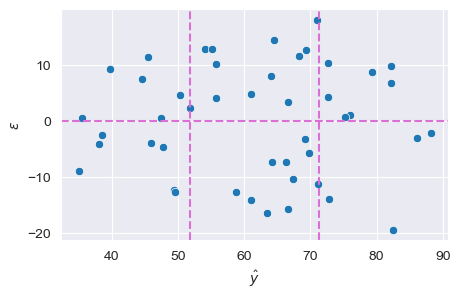

In [105]:
fig, ax = plt.subplots(figsize=(5,3))
sns.scatterplot(x=model.predict(), y=model.resid, ax=ax)
xlim = ax.get_xlim()
ax.axvline(x=xlim[0] + 1/3*(xlim[1]-xlim[0]), color='orchid', linestyle='--')
ax.axvline(x=xlim[0] + 2/3*(xlim[1]-xlim[0]), color='orchid', linestyle='--')
ax.axhline(y=0, color='orchid', linestyle='--')
ax.set_xlabel('$\hat{y}$')
ax.set_ylabel('$\epsilon$')
plt.show()

In [108]:
yt, lamb, ci = stats.boxcox(sat['Satisfaction'], alpha=0.05)
lamb

0.8861430847540374

In [109]:
ci

(-0.05515107358142512, 1.9010752025321536)

In [110]:
# Standardized residuals
influence = model.get_influence()
standard_resid = influence.resid_studentized_internal

<Axes: >

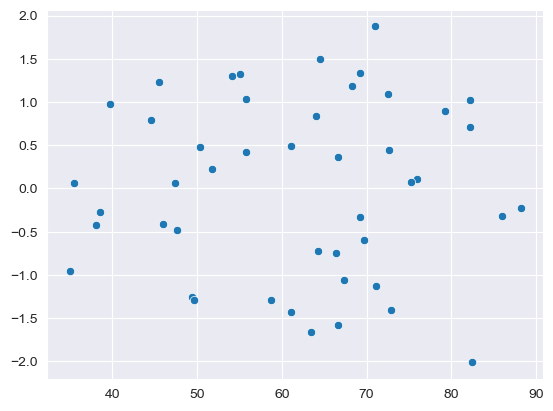

In [111]:
sns.scatterplot(x=model.predict(), y=standard_resid)

In [112]:
# Studentized  residuals
student_resid = influence.resid_studentized_external

<Axes: >

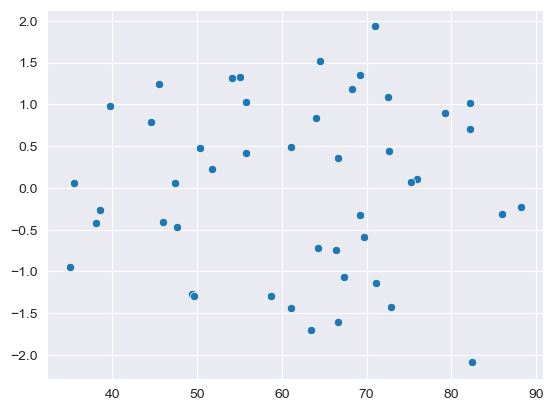

In [113]:
sns.scatterplot(x=model.predict(), y=student_resid)

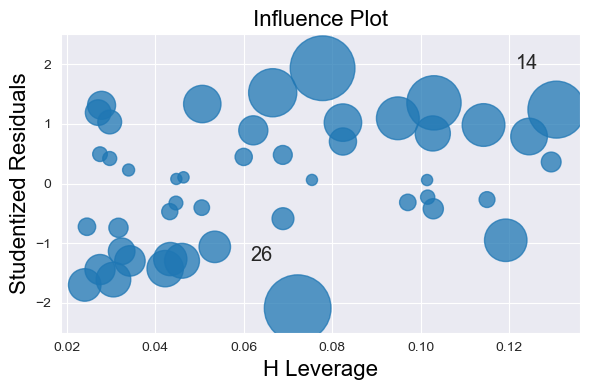

In [114]:
fig, ax = plt.subplots(figsize=(6,4))
smg.influence_plot(model, ax=ax)
ax.set_ylim(-2.5,2.5)
plt.tight_layout()
plt.show()

In [115]:
sat.loc[[14,26]]

,Satisfaction,Age,Severity,Anxiety
14,57,53,54,2.2
26,63,25,49,2.0


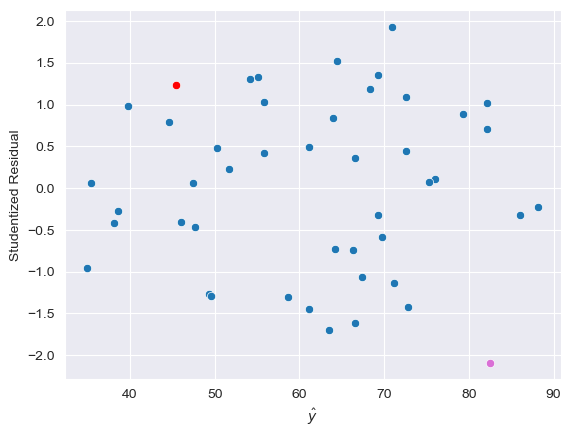

In [120]:
fig, ax = plt.subplots()
sns.scatterplot(x=model.predict(), y=student_resid, ax=ax)
sns.scatterplot(x=model.predict()[[14]], y=student_resid[[14]], ax=ax, color='red')
sns.scatterplot(x=model.predict()[[26]], y=student_resid[[26]], ax=ax, color='orchid')

ax.set_xlabel('$\hat{y}$')
ax.set_ylabel('Studentized Residual')
plt.show()

In [121]:
# Variance Inflation Factors
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [125]:
# We can get the design matrix (which we'll need) from a given model by using Patsy
from patsy import dmatrices
y, X = dmatrices('Satisfaction ~ Age + Anxiety + Severity + I(Age**2) + I(Anxiety**2) + I(Severity**2)', data=sat, return_type='dataframe')

In [126]:
# This is using the import above
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, ii) for ii in range(X.shape[1])]
vif['features'] = X.columns
print(vif)

           VIF          features
0  8592.424876         Intercept
1    83.775656               Age
2   250.432667           Anxiety
3   360.380283          Severity
4    83.471030       I(Age ** 2)
5   246.702795   I(Anxiety ** 2)
6   357.566913  I(Severity ** 2)


In [128]:
# We can get the design matrix (which we'll need) from a given model by using Patsy
from patsy import dmatrices
y, X = dmatrices('Satisfaction ~ Age + Anxiety + Severity', data=sat, return_type='dataframe')

# This is using the import above
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, ii) for ii in range(X.shape[1])]
vif['features'] = X.columns
print(vif)

          VIF   features
0  149.394736  Intercept
1    1.632296        Age
2    2.009062    Anxiety
3    2.003235   Severity


### Progress Check

In [130]:
# a
df = pd.read_csv('Teamdata.csv')
df['Run Differential'] = df['R'] - df['RA']
df['Win Percentage'] = df['W'] / (df['W'] + df['L'])
df.head()

,Unnamed: 0,teamID,yearID,lgID,G,W,L,R,RA,Run Differential,Win Percentage
0,1,ANA,2001,AL,162,75,87,691,730,-39,0.462963
1,2,ARI,2001,NL,162,92,70,818,677,141,0.567901
2,3,ATL,2001,NL,162,88,74,729,643,86,0.543210
3,4,BAL,2001,AL,162,63,98,687,829,-142,0.391304
4,5,BOS,2001,AL,161,82,79,772,745,27,0.509317


In [133]:
model = smf.ols('Q("Win Percentage") ~ Q("Run Differential")', data=df).fit()

<Axes: >

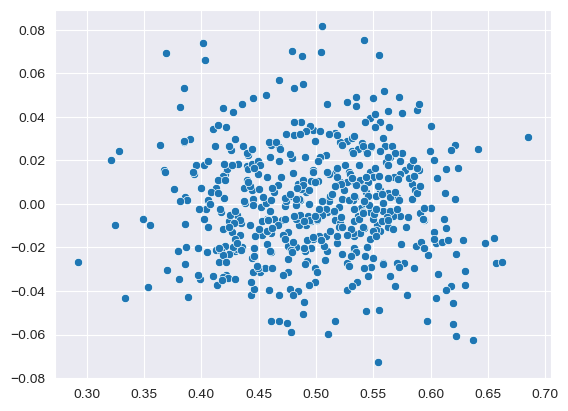

In [136]:
sns.scatterplot(x=model.predict(), y=model.resid)

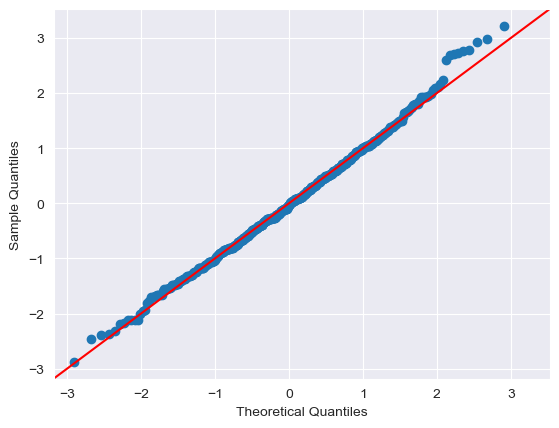

In [138]:
sm.qqplot(model.resid, fit=True, line='45')
plt.show()